# PHÂN TÍCH DỮ LIỆU

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np


In [11]:
df = pd.read_csv("./processed.csv")
df.head()

,Unnamed: 0,AQI index,Station name,Dominent pollutant,CO,Dew,Humidity,NO2,O3,Pressure,PM10,PM2.5,SO2,Temperature,Wind,Data Time S,Status,Latitude,Longitude
0,0,102.0,Hồ Chí Minh,pm25,5.0,22.0,83.0,11.0,6.0,1009.0,45.0,102.0,4.6,27.0,3.6,2021-01-21 19:00:00,Unhealthy for sensitive groups,10.782978,106.700711
1,1,221.0,Hà Nội,aqi,5.0,22.0,77.0,11.0,6.0,1015.0,45.0,55.0,4.6,18.0,1.5,2021-01-21 20:00:00,Very unhealthy,21.081121,105.818031
2,2,281.0,Hà Nội,pm25,0.3,22.0,77.0,8.7,0.9,1015.0,45.0,281.0,2.1,18.0,1.5,2021-01-21 20:00:00,Very unhealthy,21.021506,105.818875
3,3,36.0,Gia Lai,pm25,3.0,22.0,60.2,6.0,9.0,923.7,29.0,36.0,1.0,24.3,1.0,2021-01-21 20:00:00,Good,13.998599,107.996482
4,4,68.0,Thừa Thiên Huế,pm25,2.0,22.0,88.0,11.0,6.0,1015.0,52.0,68.0,4.6,21.0,1.0,2021-01-21 19:00:00,Moderate,16.462260,107.596351


### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào? 

In [12]:
numerical_des = df.describe()
missing_ratio = pd.DataFrame({col : df[col].isnull().sum() / len(df) for col in numerical_des.columns}, index=["missing_ratio"])
pd.concat([numerical_des,missing_ratio])

,Unnamed: 0,AQI index,CO,Dew,Humidity,NO2,O3,Pressure,PM10,PM2.5,SO2,Temperature,Wind,Latitude,Longitude
count,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000
mean,1195.542560,71.529088,7.156644,22.018371,75.687446,12.446173,8.114452,1001.571831,48.816901,68.505266,8.974893,25.718922,2.905940,19.723349,106.223848
std,786.772904,49.464404,9.381092,4.254478,17.804307,9.351174,7.782991,22.799640,33.496362,47.921476,23.040741,4.910598,4.777159,3.226369,0.839356
min,0.000000,1.000000,0.100000,6.000000,13.000000,1.000000,0.900000,916.900000,1.000000,1.000000,0.700000,0.500000,0.200000,10.782978,104.121423
25%,483.000000,33.000000,2.000000,20.500000,60.000000,7.000000,6.000000,1001.000000,26.000000,32.000000,4.600000,22.000000,1.500000,20.988320,105.800130
50%,1084.000000,60.000000,5.000000,22.000000,79.000000,11.000000,6.000000,1008.500000,45.000000,56.000000,4.600000,26.000000,2.500000,21.020220,105.854897
75%,1881.000000,100.000000,7.000000,25.000000,90.500000,14.000000,6.000000,1013.000000,60.000000,95.000000,4.600000,29.200000,3.600000,21.051210,106.700711
max,2621.000000,340.000000,98.000000,29.000000,100.000000,80.000000,63.000000,1024.500000,340.000000,315.000000,500.000000,39.000000,150.000000,22.678200,108.217000
missing_ratio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Pollutants distribution


In [13]:
# Tạo một đối tượng Figure
attributes = ["O3", "CO", "SO2", "NO2", "PM10", "PM2.5"]

fig = make_subplots(rows=1, cols=len(attributes),
                    column_widths=[1/len(attributes)]*len(attributes),
                    vertical_spacing=0,
                    horizontal_spacing=0.1,
                    )

for index, col in enumerate(attributes):
    fig.add_trace(go.Box(y=df[col], name=col), row=1, col=index + 1)

# Đặt tiêu đề cho biểu đồ
fig.update_layout(title='Boxplot of Pollutants')

# Hiển thị biểu đồ
fig.show()


## AQI Index

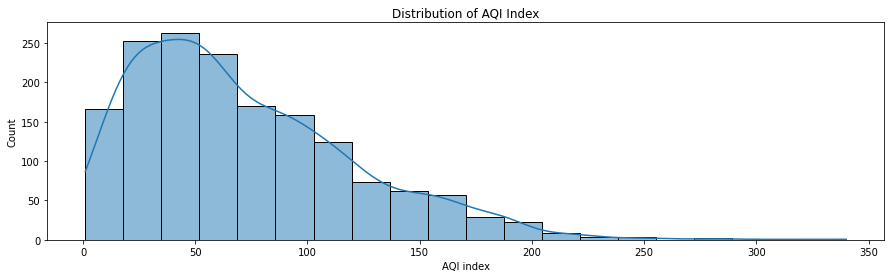

In [14]:
plt.figure(figsize=(15, 4))

sns.histplot(data=df, x='AQI index', kde=True, bins=20)

# Đặt tiêu đề cho biểu đồ
plt.title('Distribution of AQI Index')

# Hiển thị biểu đồ
plt.show()

### Với mỗi cột kiểu dữ liệu dạng categorical các giá trị được phân bố như thế nào? 

In [15]:
cate_labels=["Station name","Dominent pollutant","Status"]
cate_rows=["missing_ratio","num_diff_vals","diff_vals"]
data_cate={}
for col in cate_labels:
    row=[]
    row.append(round(df[col].isnull().sum()/len(df[col])*100,3))
    data_cate.update({f'{col}':row})

    row.append(len(df[col][df[col].isna()==False].unique()))
    row.append(np.array(df[col][df[col].isna()==False].unique()))
    data_cate.update({f'{col}':row})

cate_col_df=pd.DataFrame(data_cate,index=cate_rows)
display(cate_col_df)

,Station name,Dominent pollutant,Status
missing_ratio,0.0,0.0,0.0
num_diff_vals,10,3,6
diff_vals,"[Hồ Chí Minh, Hà Nội, Gia Lai, Thừa Thiên Huế,...","[pm25, aqi, pm10]","[Unhealthy for sensitive groups, Very unhealth..."


## Các tỉnh thành quan sát

In [16]:
fig = px.histogram(df, x='Station name', title="Regions")
fig.show()

**Ghi chú:** Hiển thị số lượng số liệu ghi nhận ở các khi vực tại Việt Nam

## BIỂU ĐỒ TRÒN VỀ TRẠNG THÁI CỦA MÔI TRƯỜNG

In [17]:
# Tính toán tần suất cho mỗi giá trị trong cột "Dominant pollutant"
pollutant_counts = df['Status'].value_counts()
pollutant_counts.name = "count"

# Vẽ biểu đồ tròn bằng plotly
fig = px.pie(pollutant_counts, values='count', names=pollutant_counts.index,
             title="Proportion of Status")
fig.show()

Danh sách các mức độ ô nhiễm đưa ra đã được sắp xếp theo thứ tự tăng dần về độ an toàn:

- Hazardous: Mức độ nguy hiểm cao nhất, chỉ số chất lượng không khí đạt mức rất cao và có thể gây nguy hiểm cho sức khỏe con người.
- Very Unhealthy: Mức độ rất không tốt, chỉ số chất lượng không khí đạt mức rất cao và có thể gây nguy hiểm cho sức khỏe con người.
- Unhealthy: Mức độ không tốt, chỉ số chất lượng không khí đạt mức cao và có thể gây hại cho sức khỏe con người.
- Unhealthy for Sensitive Groups: Mức độ không tốt cho nhóm nhạy cảm, chỉ số chất lượng không khí đạt mức cao và có thể gây hại cho những người nhạy cảm đối với ô nhiễm không khí.
- Moderate: Mức độ trung bình, chỉ số chất lượng không khí ở mức trung bình, không gây nguy hiểm cho sức khỏe con người.
- Good: Mức độ tốt nhất, chỉ số chất lượng không khí ở mức tốt, không có nguy cơ đáng kể đối với sức khỏe con người.

***Nhận xét:***
- Theo thống kê đã nêu, tỉ lệ mà không khí đạt ở mức sạch nằm trong khoảng 40.8%, mức tạm ổn (Moderate) thì đặt khoảng 34.2%. Với 2 chỉ số trên hiển thị trạng thái không khí không ảnh hưởng đến sức khỏe người dân ở mức 75%.
- Vậy là với 25% trạng thái ghi nhận là có thể gân ảnh hướng để sức khỏe cả con người => **là một chỉ số đáng báo động.**
  - Cụ thể là: 
    - Đã ghi nhận được 2 lần trạng thái không khí được ghi nhận ở mức báo động cao nhất - Hazadous, gây nguy hiểm trực tiếp đến sức khỏe.
    - 16.2% cho thấy không khí có thể tác động đến nhóm người bị nhạy cảm với ô nhiễm không khí, 7.53% là không tốt với sức khỏe.
    - Trạng thái Very Unhealthy cũng xuất hiện với 1.04% (17 lần) cho thấy chất lượng không khí đang báo động trầm trọng.

## Chất ô nhiễm chủ đạo


In [18]:
# Tính toán tần suất cho mỗi giá trị trong cột "Dominant pollutant"
pollutant_counts = df['Dominent pollutant'].value_counts()
pollutant_counts.name = "count"

# Vẽ biểu đồ tròn bằng plotly
fig = px.pie(pollutant_counts, values='count', names=pollutant_counts.index,
             title="Proportion of Dominant Pollutants")
fig.show()

***Nhận xét:***
- Biểu đồ trên hiển thị các chất gây ô nhiễm chủ yếu đến môi trường. Đa phần đó là do bụi mịn, có kích thước nhỏ hơn 2.5 micromet (pm25).
- Theo sau là 2 chỉ số là pm10 - bụi mình có kích thước nhỏ hơn 10 micromet (14.9%) và aqi (4.59%).